In [178]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import randrange


def draw(g):
    n = g.number_of_nodes()
    pos = nx.kamada_kawai_layout(g)
    labels = {}
    for i in range(n):
        labels[i] = str(i)

    nx.draw_networkx_labels(
        g,
        pos,
        labels,
        font_size=10,
        font_color="black"
    )

    node_size = 30
    nx.draw_networkx_nodes(
        g,
        pos,
        nodelist=[i for i in range(n)],
        node_color="red",
        node_size=node_size,
    )

    nx.draw_networkx_edges(
        g,
        pos,
        width=1,
        alpha=1,
        edge_color="black"
    )
    plt.show()

In [179]:
def generate_graph(n, k):
    visit = np.full(n, False, bool)
    g = [[] for _ in range(n)]
    visit[0] = True
    stack = [0]
    while stack or not np.all(visit):
        if not stack:
            for i in range(n):
                if not visit[i]:
                    stack.append(i)
                    visit[i] = True
                    g[i].append(0)
                    break
        v = stack.pop()
        for _ in range(randrange(1, k)):
            x = randrange(n)
            if x != v and x not in g[v] and v not in g[x]:
                g[v].append(x)
                if not visit[x]:
                    visit[x] = True
                    stack.append(x)

    edges = [(i, j) for i in range(n) for j in g[i]]
    return edges


def create_graph(n, k):
    g = nx.DiGraph()
    g.add_edges_from(generate_graph(n, k))
    while len([c for c in nx.strongly_connected_components(g)]) > 1:
        g = nx.DiGraph()
        g.add_edges_from(generate_graph(n, k))

    mat = np.zeros((n, n))
    for i in range(n):
        mat[i, list(g.neighbors(i))] = 1
    return g, mat


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

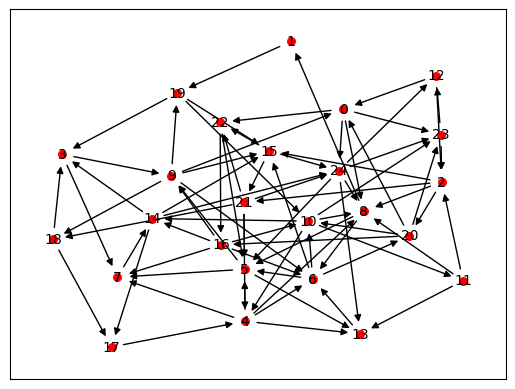

In [180]:
graph, matrix = create_graph(25, 8)
print(matrix)
draw(graph)

In [183]:
def scaled_matrix(mat):
    return mat / np.sum(mat, axis=1)[:,None]

def power_method(mat):
    n = mat.shape[0]
    x = np.full(n, 1 / n, float)
    for _ in range(100):
        x = x @ mat
    return x


In [184]:
scal_matrix = scaled_matrix(matrix)
vector = power_method(scal_matrix)
print(np.argsort(vector)[::-1])
print(np.sort(vector)[::-1])

[ 6  5 14 15  7 24  9 13  8 10  4 22 23  2  3  0 21 20 12 17 16 19 18  1
 11]
[0.08538757 0.07881928 0.06940345 0.06501906 0.05595203 0.05275651
 0.04803115 0.04755278 0.04583628 0.04211254 0.03960442 0.03540564
 0.03412956 0.03368032 0.03345828 0.03085601 0.0300931  0.02976697
 0.02761608 0.02516329 0.02514456 0.02488499 0.01562485 0.01527876
 0.00842251]


In [ ]:
def page_rank():
    pass